# Data Science project for housing agency

## Objectives

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

----

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
import ssl

In [6]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
ssl._create_default_https_context = ssl._create_unverified_context # disable SSL verification
boston_df = pd.read_csv(boston_url)

In [29]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### BOXPLOT - Median value of owner-occupied homes

- MEDV - Median value of owner-occupied homes in $1000's
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)


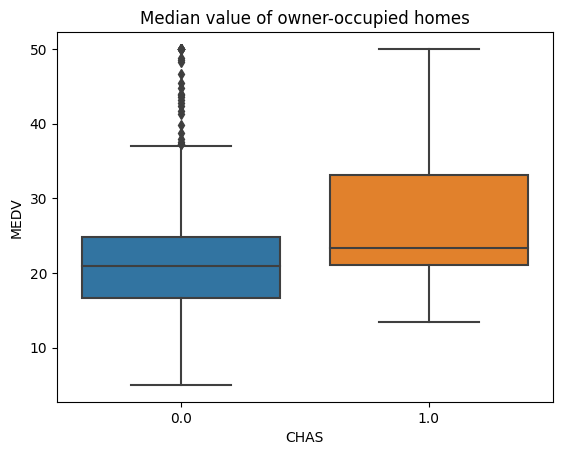

In [10]:
ax = sns.boxplot(x='CHAS', y='MEDV', data=boston_df,)
ax.set_title('Median value of owner-occupied homes')
plt.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not?

- MEDV - Median value of owner-occupied homes in $1000's
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in median value of hauses by the Charles river")
* $H_1: µ_1 ≠ µ_2$ ("there is difference in median value of hauses by the Charles river")


In [36]:
boston_df['CHAS'] = boston_df['CHAS'].astype(str)

The Levene's Test in Python to check test significance


In [37]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == '1.0']['MEDV'], boston_df[boston_df['CHAS'] == '0.0']['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [51]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == '0.0']['MEDV'],
                   boston_df[boston_df['CHAS'] == '1.0']['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than 0.05, we can reject the null hypothesis as there is enough evidence to say there is a statistical difference in median value of houses depending on if the tract bounds the Charles river or not.

----

### BARPLOT - for the Charles river variable

 CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

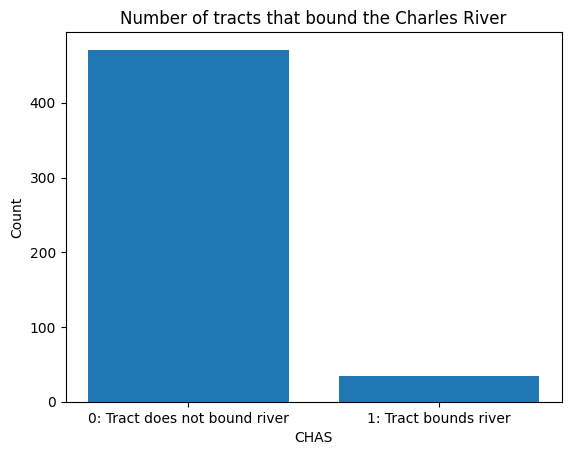

In [11]:
# Count the number of occurrences of each value in the "CHAS" column
counts = boston_df["CHAS"].value_counts()

# Create a bar plot using Matplotlib's bar() method
plt.bar(x=counts.index, height=counts.values)

# Customize the x-axis and y-axis labels and title
plt.xlabel("CHAS")
plt.ylabel("Count")
plt.title("Number of tracts that bound the Charles River")

# Customize the tick labels for the x-axis
plt.xticks(ticks=counts.index, labels=["0: Tract does not bound river", "1: Tract bounds river"])

# Show the plot
plt.show()


### Boxplot for the MEDV variable vs the AGE variable

- MEDV - Median value of owner-occupied homes in $1000's
- AGE - proportion of owner-occupied units built prior to 1940

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = '70 years and older'

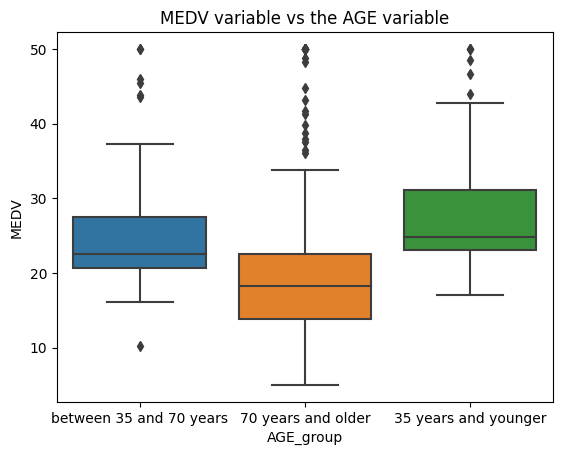

In [13]:
ax = sns.boxplot(x='AGE_group', y='MEDV', data=boston_df,)
ax.set_title('MEDV variable vs the AGE variable')
plt.show()

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

- MEDV - Median value of owner-occupied homes in $1000's
- AGE - proportion of owner-occupied units built prior to 1940

I create a new column for this newly assigned group our categories will be teachers that are:
* 35 years and younger
* between 35 and 70 years
* 70 years and older

State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
* $H_1:$ At least one of the means differ

Test of equality of variance


In [41]:
scipy.stats.levene(boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

**Conclusion 1:** Assuming a significance level of $\alpha=0.05$, we will reject the null hypothesis if the p-value is less than 0.05.

Using the Levene's test, the obtained p-value is 0.0629, which is greater than 0.05. Therefore, we do not have sufficient evidence to reject the null hypothesis.

This means that we cannot conclude that there is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE).



The result of the Levene's test in this case does not indicate significant evidence of unequal variances.

Therefore, it may be appropriate to conduct ANOVA to test for significant differences in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE). 

First, separate the three samples (one for each category) into a variable each.


In [42]:
lower_35 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
between_35_and_70 = boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV'] 
older_70 = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

Now, run a one-way ANOVA.


In [43]:
f_statistic, p_value = scipy.stats.f_oneway(lower_35, between_35_and_70, older_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion 2:** The obtained F-statistic of 36.407 and the associated p-value of 1.7105e-15 suggests that there is strong evidence to reject the null hypothesis that the population means of the three age groups are equal.

Therefore, I can conclude that there is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE)

----

### Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

- NOX - nitric oxides concentration (parts per 10 million)
- INDUS - proportion of non-retail business acres per town.

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business')

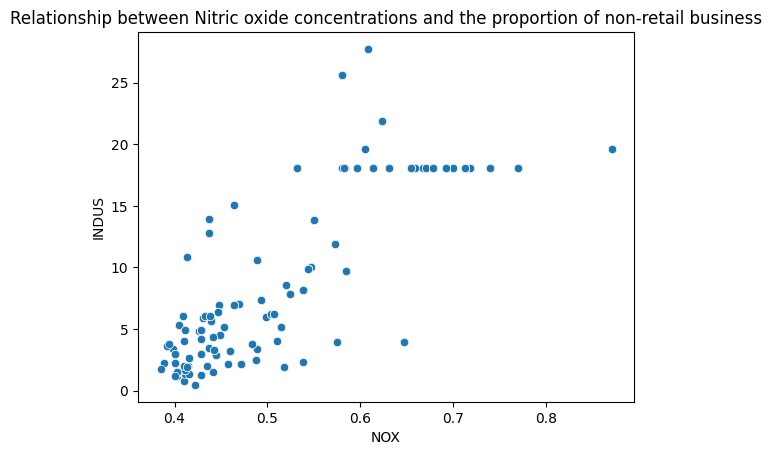

In [16]:
ax = sns.scatterplot(x='NOX', y='INDUS',data=boston_df)
ax.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business')

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

- NOX - nitric oxides concentration (parts per 10 million)
- INDUS - proportion of non-retail business acres per town.

State the hypothesis:
* $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [44]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061236247e-98)

**Conclusion:** With an alpha level of 0.05, the p-value obtained from the Pearson correlation test between Nitric oxide concentrations and proportion of non-retail business acres per town is much smaller than the chosen alpha level (p-value = 7.91e-98 < 0.05). This suggests strong evidence against the null hypothesis that Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town.

Therefore, I reject the null hypothesis and accept the alternative hypothesis that there is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

In conclusion, I can say that there is a significant positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town in the Boston housing dataset.

----

### Histogram for the pupil to teacher ratio variable

PTRATIO - pupil-teacher ratio by town

Text(0.5, 1.0, 'The pupil to teacher ratio')

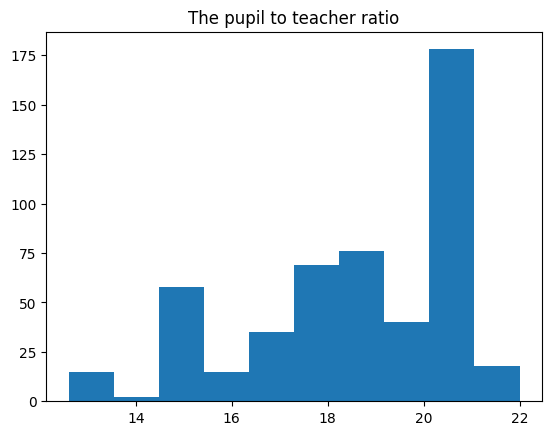

In [20]:
pyplot.hist(boston_df['PTRATIO'])
plt.title("The pupil to teacher ratio")


----


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

- DIS - weighted distances to five Boston employment centres
- MEDV - Median value of owner-occupied homes in $1000's

State of the hypothesis:
* $H_0:$ There is no significant relationship between the weighted distances to the five Boston employment centres (DIS) and the median value of owner-occupied homes (MEDV).
* $H_1:$ There is a significant relationship between the weighted distances to the five Boston employment centres (DIS) and the median value of owner-occupied homes (MEDV).

In [49]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        14:14:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**  Based on the regression analysis, the p-value for the weighted distances to the five Boston employment centers (DIS) is 0.000, which is less than the significance level of 0.05. Therefore, I reject the null hypothesis and conclude that there is a statistically significant relationship between the weighted distances to the five Boston employment centers and the median value of owner-occupied homes.

The coefficient for DIS is positive (1.0916), indicating that an increase in the weighted distance to the employment centers is associated with an increase in the median value of owner-occupied homes. However, the R-squared value of 0.062 indicates that only a small percentage of the variance in median home values can be explained by the weighted distances to the employment centers.

In summary, while there is a statistically significant relationship between DIS and MEDV, it is not a very strong one. Other factors, such as crime rates, accessibility to public transportation, and quality of schools, may play a more significant role in determining median home values in the Boston area.